# Lasso Regression

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

Rozważmy następujący zbiór punktów:

In [9]:
true_fun = lambda X: np.cos(1.5 * np.pi * X)
n_samples=20
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x=np.vstack(x)

# Przykład
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

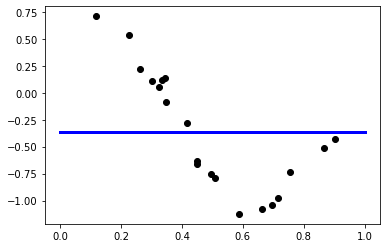

In [10]:
clf = Lasso(alpha=1.0)
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

## Regresja liniowa

LR degree 2
LR degree 20


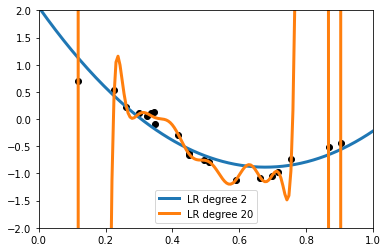

In [11]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zadanie 
Proszę wykonać 
* regresję dla wielomianów o stopniu **20**
* regresję (Lasso Regression) dla wielomianów o stopniu **20** oraz
   * alpha = 1 
   * alpha = 10 000 
   * alpha = 0.0001

LR degree 20
Lasso degree 20, a=1
Lasso degree 20, a=10000
Lasso degree 20, a=0.0001


/Users/jakubpiasecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.026274452032869433, tolerance: 0.0005843873597788318
  model = cd_fast.enet_coordinate_descent(


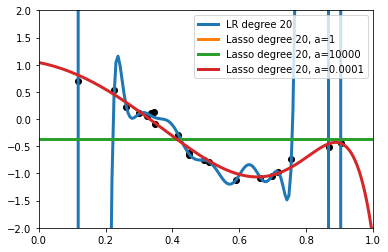

In [12]:
   # prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

## Lasso + poly
models.append(('Lasso degree 20, a=1', make_pipeline(PolynomialFeatures(20), Lasso(1)) ))
models.append(('Lasso degree 20, a=10000', make_pipeline(PolynomialFeatures(20), Lasso(10000)) ))
models.append(('Lasso degree 20, a=0.0001', make_pipeline(PolynomialFeatures(20), Lasso(0.0001)) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
x_plot = np.vstack(np.linspace(-3, 3, 1000))
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr alpha.

In [13]:
from sklearn.model_selection import GridSearchCV

kfold = model_selection.KFold(n_splits=10, random_state=None)
scoring = 'neg_mean_absolute_error'

grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.Lasso()),
                    param_grid={
                        'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 25],
                        'lasso__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1]
                    },
                    cv=kfold,
                    refit=True)

grid.fit(x, y)
grid.best_params_

/Users/jakubpiasecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05550783527124507, tolerance: 0.0003675444089215088
  model = cd_fast.enet_coordinate_descent(
/Users/jakubpiasecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1220849618099768, tolerance: 0.0005229068662097803
  model = cd_fast.enet_coordinate_descent(
/Users/jakubpiasecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11271965672510889, tolerance: 0.0005392935904740116
  model = cd_fast.enet_coordinate_descent(
/Users/jakubpiasecki/opt/anacond

{'lasso__alpha': 0.001, 'polynomialfeatures__degree': 5}

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr <tt>alpha</tt> za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

*  policz r_square score.

In [15]:
import pandas as pd
df_adv = pd.read_csv('https://raw.githubusercontent.com/przem85/bootcamp/master/statistics/Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn import  metrics

kfold = model_selection.KFold(n_splits=10, random_state=None)
scoring = 'neg_mean_absolute_error'

grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.Lasso()),
                    param_grid={
                        'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 25],
                        'lasso__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1]
                    },
                    cv=kfold,
                    refit=True)

grid.fit(X, y)
print("R^2: {}".format(metrics.r2_score(y, grid.predict(X))))
grid.best_params_

/Users/jakubpiasecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.657193840067293, tolerance: 0.4850155777777778
  model = cd_fast.enet_coordinate_descent(
/Users/jakubpiasecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.447582201322415, tolerance: 0.49490757777777783
  model = cd_fast.enet_coordinate_descent(
/Users/jakubpiasecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.44526032420928, tolerance: 0.4737236444444444
  model = cd_fast.enet_coordinate_descent(
/Users/jakubpiasecki/opt/anaconda3/lib/pyth

R^2: 0.9914869731209235


/Users/jakubpiasecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.321163587529886, tolerance: 0.4727931111111111
  model = cd_fast.enet_coordinate_descent(
/Users/jakubpiasecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.574718653360193, tolerance: 0.541714875
  model = cd_fast.enet_coordinate_descent(


{'lasso__alpha': 0.1, 'polynomialfeatures__degree': 3}